# Session #1 HomeWork

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# EDA
## Loading the data

In [1]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.to_csv("ny_airbinb.csv")

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Looking to `price` variable

In [20]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

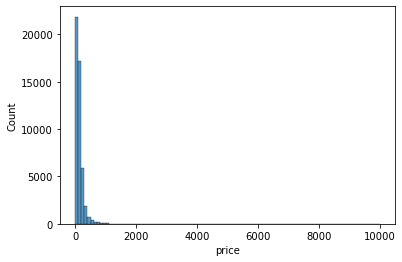

In [44]:
sns.histplot(df['price'], bins= 100);


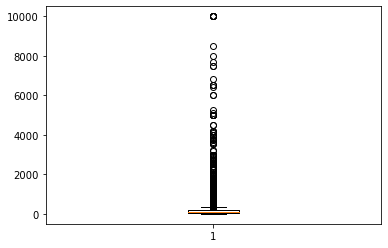

In [38]:
plt.boxplot(df['price']);

The variable `price` has a very long tail. it's heavy right skewed.
### Transforming data to match normal distribution

In [46]:
df['price_log'] = np.log1p(df['price'])

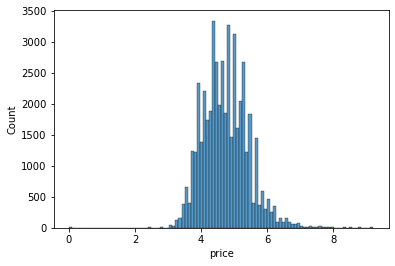

In [47]:
sns.histplot(np.log1p(df['price']), bins= 100);

it's looks like a normal distribution

## Holding necessary features

In [22]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [51]:
new_columns = ['latitude', 'longitude', 'price', 'price_log', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
new_columns

['latitude',
 'longitude',
 'price',
 'price_log',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [52]:
df_ = df[new_columns]
df_

,latitude,longitude,price,price_log,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,5.010635,1,9,0.21,6,365
1,40.75362,-73.98377,225,5.420535,1,45,0.38,2,355
2,40.80902,-73.94190,150,5.017280,3,0,NaN,1,365
3,40.68514,-73.95976,89,4.499810,1,270,4.64,1,194
4,40.79851,-73.94399,80,4.394449,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,4.262680,2,0,NaN,2,9
48891,40.70184,-73.93317,40,3.713572,4,0,NaN,2,36
48892,40.81475,-73.94867,115,4.753590,10,0,NaN,1,27
48893,40.75751,-73.99112,55,4.025352,1,0,NaN,6,2


In [53]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   price_log                       48895 non-null  float64
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 3.4 MB


# Question 1 

> Find a feature with missing values. How many missing values does it have?

In [54]:
df_.isnull().sum()[df_.isnull().sum() != 0]

reviews_per_month    10052
dtype: int64

# Question 2

What’s the median (50% percentile) for variable ‘minimum_nights’?

In [55]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [56]:
df['minimum_nights'].median()

3.0